# Model Machine Learning Prediksi Penyakit Tanaman Tomat

## Fungsi Ekstraksi ID Google Drive

In [1]:
import re

def extract_drive_id(drive_url):
    # Regular expression to extract file ID from the URL
    drive_id_pattern = r'\/d\/([a-zA-Z0-9_-]+)'
    match = re.search(drive_id_pattern, drive_url)
    if match:
        return match.group(1)
    else:
        raise ValueError("Tidak dapat mengekstrak ID file dari URL")

# Contoh URL Google Drive
drive_url = 'https://drive.google.com/file/d/1hi6MbEUacSvME_dDcg-SL_i0Z0VQ73Cd/view?usp=sharing'

# Ekstraksi ID file
file_id = extract_drive_id(drive_url)
print(f"ID file adalah: {file_id}")

ID file adalah: 1hi6MbEUacSvME_dDcg-SL_i0Z0VQ73Cd


## Mengunduh dan Mengekstrak File dari Google Drive

In [2]:
import gdown
import zipfile
import os

# ID file Google Drive
file_id = '1f-Tgfvk_06yjk4wgzkPKXMB4KK-Jp-qz'
# URL untuk mengunduh file
url = f'https://drive.google.com/uc?id={file_id}&export=download'
# Nama file output
output = 'Dataset_Tomat.zip'

# Mengunduh file
gdown.download(url, output, quiet=False)

# Ekstrak file zip
try:
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("Ekstraksi berhasil!")
except zipfile.BadZipFile:
    print("File yang diunduh bukan file zip atau rusak")

# Periksa apakah file sudah diekstrak
for root, dirs, files in os.walk('dataset'):
    for file in files:
        print(os.path.join(root, file))

Downloading...
From (original): https://drive.google.com/uc?id=1f-Tgfvk_06yjk4wgzkPKXMB4KK-Jp-qz&export=download
From (redirected): https://drive.google.com/uc?id=1f-Tgfvk_06yjk4wgzkPKXMB4KK-Jp-qz&export=download&confirm=t&uuid=bb90e05d-8239-455d-8c1f-c73316770879
To: /content/Dataset_Tomat.zip
100%|██████████| 188M/188M [00:04<00:00, 46.1MB/s]


Output streaming akan dipotong hingga 5000 baris terakhir.
dataset/Dataset Tomat/train/Tomato___Late_blight/c0eb1cc5-185a-4f20-b8cd-a3943cd9588b___RS_Late.B 6541.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/b62c8328-7089-4b43-b77e-20511356d04b___RS_Late.B 5490.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/d4af5357-afc6-4a81-8d7c-bf8f947c3c91___RS_Late.B 6908.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/3152f2ab-94e6-4e06-8fb9-568c45d31b0b___RS_Late.B 6175.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/812654c4-843c-42b1-a026-ab3ee7c9f837___RS_Late.B 7061.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/a5a9303d-5e02-4fcb-89be-86c5466d8a04___RS_Late.B 6084.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/3956f2c5-b3a4-49a4-8612-c7003d62698b___RS_Late.B 6287.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/cedebb08-bf5c-434a-931e-63ce9621b77e___GHLB2 Leaf 9091.JPG
dataset/Dataset Tomat/train/Tomato___Late_blight/1329e768-8331-4853-8d35-c03f5586c64

## Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Menghasilkan Dataset dari Direktori Gambar

In [4]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/Dataset Tomat/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

class_names = train_set.class_names
train_set = train_set.map(lambda x, y: (x / 255.0, y))

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/Dataset Tomat/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_set = val_set.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


## Membangun dan Mengompilasi Model Klasifikasi Gambar

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [6]:
learning_rate = 0.00001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

## Melatih Model CNN

In [8]:
history = model.fit(
    train_set,
    epochs=50,
    validation_data=val_set,
)

Epoch 1/50
313/313 [==============================] - 32s 77ms/step - loss: 2.2064 - accuracy: 0.2030 - val_loss: 1.9361 - val_accuracy: 0.5020
Epoch 2/50
313/313 [==============================] - 23s 71ms/step - loss: 1.5984 - accuracy: 0.4965 - val_loss: 1.2725 - val_accuracy: 0.5980
Epoch 3/50
313/313 [==============================] - 23s 73ms/step - loss: 1.2075 - accuracy: 0.6030 - val_loss: 1.0471 - val_accuracy: 0.6450
Epoch 4/50
313/313 [==============================] - 23s 74ms/step - loss: 1.0569 - accuracy: 0.6490 - val_loss: 0.9611 - val_accuracy: 0.6840
Epoch 5/50
313/313 [==============================] - 23s 74ms/step - loss: 0.9651 - accuracy: 0.6848 - val_loss: 0.8725 - val_accuracy: 0.7070
Epoch 6/50
313/313 [==============================] - 23s 74ms/step - loss: 0.8941 - accuracy: 0.7051 - val_loss: 0.8112 - val_accuracy: 0.7180
Epoch 7/50
313/313 [==============================] - 23s 74ms/step - loss: 0.8424 - accuracy: 0.7244 - val_loss: 0.7701 - val_accuracy:



## Mengevaluasi Model CNN

In [9]:
loss, accuracy = model.evaluate(val_set)
print(f'Test accuracy: {accuracy*100:.2f}%')
loss, accuracy = model.evaluate(train_set)
print(f'Train accuracy: {accuracy*100:.2f}%')

32/32 [==============================] - 1s 27ms/step - loss: 0.3525 - accuracy: 0.8860
Test accuracy: 88.60%
313/313 [==============================] - 10s 32ms/step - loss: 0.1420 - accuracy: 0.9588
Train accuracy: 95.88%


## Plot Hasil Pelatihan Model CNN

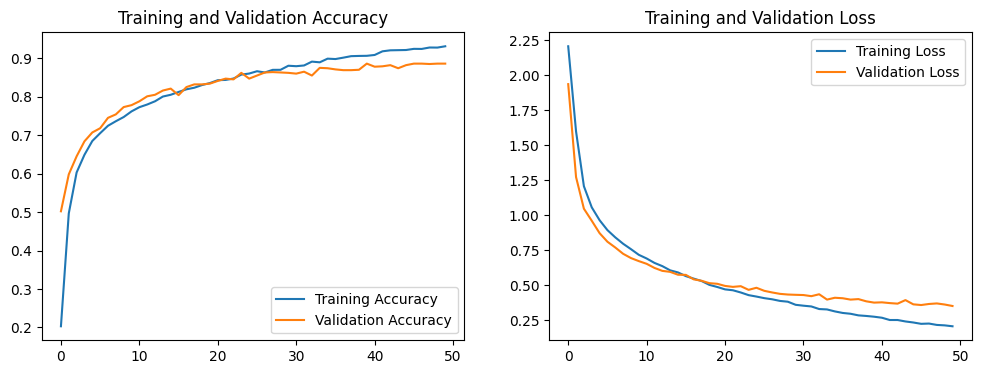

In [10]:
# Plot hasil pelatihan
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# Menyimpan model
model.save('tomato_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Mengonversi Model Keras ke Format TFLite dan TensorFlow.js

In [12]:
# Load the Keras model
model = tf.keras.models.load_model('tomato_disease_model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('tomato_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [1]:
# Convert model Keras ke TFJs
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras tomato_disease_model.h5 tomato_disease_model_tfjs

import os
os.listdir('tomato_disease_model_tfjs')

2024-06-21 07:24:22.849437: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 07:24:24.805219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


['group1-shard1of13.bin',
 'group1-shard12of13.bin',
 'group1-shard2of13.bin',
 'model.json',
 'group1-shard13of13.bin',
 'group1-shard10of13.bin',
 'group1-shard4of13.bin',
 'group1-shard9of13.bin',
 'group1-shard6of13.bin',
 'group1-shard7of13.bin',
 'group1-shard8of13.bin',
 'group1-shard3of13.bin',
 'group1-shard11of13.bin',
 'group1-shard5of13.bin']

## Memuat Model Keras dan Memprediksi Penyakit Tanaman Tomat dari Gambar




Saving septoria_leaf_spot.jpg to septoria_leaf_spot.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


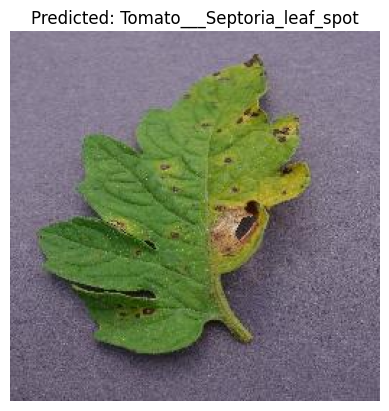

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model

# Load model yang telah disimpan
model = load_model('tomato_disease_model.h5')

# Asumsi class_names didefinisikan sebelumnya, misalnya:
class_names = ['Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy']

# Fungsi untuk menampilkan gambar dan hasil prediksi
def predict_image(image_path, model, class_names):
    img = load_img(image_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    predicted_label = class_names[predicted_class[0]]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Unggah gambar
uploaded = files.upload()

# Lakukan prediksi untuk setiap gambar yang diunggah
for image_path in uploaded.keys():
    predict_image(image_path, model, class_names)